### Table of Contents
1. [Loading Data](#setup)
2. [Exploratory Data Analysis (EDA)](#eda)
   - 2.2 [Data Profiling and Summary Statistics](#basic-eda)
   - 2.3 [Correlation Analysis of Transport-Related Variables](#correlation-analysis)
3. [Data Preprocessing](#data-preprocessing)
   - 3.1 [Visualizing Missing Data](#missingdata)
   - 3.2 [Data Validation](#data-validation)
   - 3.3 [Checking for Duplicates](#duplicates)
   - 3.4 [Encoding Multi-Label Features using MultiLabelBinarizer](#onehotencoding-multi)
   - 3.5 [ColumnTransformer](#columntransformer)
4. [Model: Linear Regression](#linear-regression)
   - 4.1 [Model Training and Evaluation](#model-training)
   - 4.2 [Model Saving in pkl-format](#model-saving)
   - 4.3 [Regression Equation](#regression-equation)
   - 4.4 [Regression Coefficients](#regression-coefficients)
   - 4.5 [Prediction](#prediction)

# 1️⃣ Setup and Data Loading 📥 <a id="setup"></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from ast import literal_eval  
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MultiLabelBinarizer

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [3]:
df = pd.read_csv('/kaggle/input/individual-carbon-footprint-calculation/Carbon Emission.csv')

# change display settings to show all columns
pd.set_option('display.max_columns', None)

#rename
# rename columns: replace spaces with underscores
df.columns = df.columns.str.replace(' ', '_')

# convert Gender to Boolean-datatyp
df.rename(columns= {'Sex':'Gender'}, inplace = True)

df.head()

,Body_Type,Gender,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


| Variable Name                      | Description                                                  | Values                                                | continuous | discrete | ordinal | nominal |
|------------------------------------|--------------------------------------------------------------|-------------------------------------------------------|:----------:|:--------:|:-------:|:-------:|
| Body_Type                          | Classification of body type                                  | underweight, normal, overweight, obese                        |    |          |    x    |         |
| Gender                             | Biological sex of the individual                             | female, male                                                  |    |          |         |    x    |
| Diet                               | Type of dietary preferences                                  | vegan, vegetarian, pescatarian, omnivore                      |    |          |    x    |         |
| How_Often_Shower                   | Frequency of showering                                       | less frequently, daily, twice a day, more frequently          |    |          |    x    |         |
| Heating_Energy_Source              | Source of energy used for home heating                       | coal, electricity, natural gas, wood                          |    |          |         |    x    |
| Transport                          | Preferred mode of transportation                             | walk/bicycle, public (transport), private (=car)              |    |          |         |    x    |
| Vehicle_Type                       | Types of fuel used for vehicles                              | diesel, petrol, hybrid, lpg, electric, NaN                    |    |          |         |    x    |
| Social_Activity                    | Frequency of participating in social activities              | never, sometimes, often                                       |    |          |    x    |         |
| Monthly_Grocery_Bill               | Amount spent on groceries each month                         | (range: 50-299)                                               |  x |          |         |         |
| Frequency_of_Traveling_by_Air      | Frequency of using aircraft in the last month                | never, rarely, frequently, very frequently                    |    |          |    x    |         |
| Vehicle_Monthly_Distance_Km        | Distance traveled by vehicle in the last month               | between 0 and 9999                                            |  x |         |         |         |
| Waste_Bag_Size                     | Classification of garbage bag sizes                          | small, medium, large, extra large                             |    |          |    x    |         |
| Waste_Bag_Weekly_Count             | Number of waste bags disposed of weekly                      | (range: 1-7)                                                  |    |    x     |         |         |
| How_Long_TV_PC_Daily_Hour          | Daily time spent using TV or computer                        | (range: 0-24 hours)                                           |    |    x     |         |         |
| How_Many_New_Clothes_Monthly       | Number of new clothing items purchased each month            | (range: 0-50)                                                 |    |    x     |         |         |
| How_Long_Internet_Daily_Hour       | Daily time spent on the Internet                             | (range: 0-24 hours)                                           |    |    x     |         |         |
| Energy_efficiency                  | Concern for purchasing energy-efficient devices              | Yes, Sometimes, No                                            |    |          |    x    |         |
| Recycling                          | Types of materials recycled                                  | Metal, Glass, Plastic, Paper                                  |    |          |         |    x    |
| Cooking_With                       | Appliances used for cooking                                  | Microwave, Stove, Oven, ~Airfryer~, Grill                     |    |          |         |    x    |
| CarbonEmission                     | Total carbon emissions produced                              | between 306 and 8377                                          |  x |         |         |         |

# 2️⃣ Exploratory Data Analysis (EDA) 🔍 <a id="eda"></a>

<a id="basic-eda"></a> 
## 2.2 Data Profiling and Summary Statistics 🔬 🔍

In [4]:
print("Full dataset shape is", df.shape)
##############################################

# Berechnet den maximalen Wert einer Spalte, wenn sie numerisch ist
def max_value(column):     
    if pd.api.types.is_numeric_dtype(column):  # Überprüfe, ob der Datentyp numerisch ist
        return column.dropna().max() if not column.dropna().empty else np.nan
    return ""

# Gibt die einzigartigen Werte einer Spalte zurück, oder eine Range (falls es eine gibt)
def get_unique_values(column):     
    if pd.api.types.is_integer_dtype(column):  # Überprüfe, ob der Datentyp eine Ganzzahl ist
        unique_vals = sorted(set(column.dropna()))
        min_val, max_val = column.min(), column.max()
        if unique_vals == list(range(min_val, max_val + 1)):
            return f"range({min_val},{max_val + 1})"
        return unique_vals
#        return f"between {min_val} and {max_val}"
    return sorted(set(column.dropna()))


def summary(df=df):
    summary_df = pd.DataFrame({
        'data type': df.dtypes.astype(str),
        'missing data': df.isna().sum(),
        'unique values': [get_unique_values(df[col]) for col in df.columns],
        'unique values max': [max_value(df[col]) for col in df.columns],
        'Cardinality': df.nunique()
    })
    return summary_df


# Sortiere nach 'data type' und dann nach 'number of unique values'
summary_df = summary(df).sort_values(by=['data type', 'Cardinality'])


Full dataset shape is (10000, 20)


In [5]:
# change display settings 
max_length_col = len(str("'Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer'"))+2
pd.set_option('max_colwidth', max_length_col + 1) #Set the Column Width #You can increase the width by passing an int. Or put at the max passing None:
#pd.set_option('max_colwidth', None) #Set the Column Width #You can increase the width by passing an int. Or put at the max passing None:
#pd.reset_option('max_colwidth') #Rückgängig machen

summary_df.loc['Vehicle_Type', 'unique values'] = ', '.join(['diesel', 'electric', 'hybrid', 'lpg', 'petrol']) #ist string statt Liste
#summary_df.loc['Vehicle_Type', 'unique values'] = ['diesel', 'electric', 'hybrid', 'lpg', 'petrol'] #macht Fehlermeldung

#change values for "Recycling" & "Cooking_With"

for headline in ["Recycling" ,"Cooking_With"]:
    unique_values= set([item for sublist in df[headline].unique() for item in eval(sublist)]) #eval - Convert string representation of list to an actual list
    
    summary_df.loc[headline,'unique values'] = str(unique_values)
    summary_df.loc[headline,'Cardinality'] = len(unique_values)


# Setze die maximale Breite einer Spalte auf None, um keine Begrenzung zu haben
#pd.set_option('display.max_colwidth', None)    

summary_df 

,data type,missing data,unique values,unique values max,Cardinality
Waste_Bag_Weekly_Count,int64,0,"range(1,8)",7,7
How_Long_TV_PC_Daily_Hour,int64,0,"range(0,25)",24,25
How_Long_Internet_Daily_Hour,int64,0,"range(0,25)",24,25
How_Many_New_Clothes_Monthly,int64,0,"range(0,51)",50,51
Monthly_Grocery_Bill,int64,0,"range(50,300)",299,250
CarbonEmission,int64,0,"[306, 369, 392, 412, 436, 440, 443, 453, 460, 47...",8377,3509
Vehicle_Monthly_Distance_Km,int64,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...",9999,4003
Gender,object,0,"[female, male]",,2
Transport,object,0,"[private, public, walk/bicycle]",,3
Social_Activity,object,0,"[never, often, sometimes]",,3


**Observation:**
> The cardinality of the categorical features ranges from 3 to 5, which is considered low cardinality.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Grocery_Bill,10000.0,173.8752,72.234018,50.0,111.0,173.0,237.00,299.0
Vehicle_Monthly_Distance_Km,10000.0,2031.4859,2769.715597,0.0,69.0,823.0,2516.75,9999.0
Waste_Bag_Weekly_Count,10000.0,4.0246,1.990375,1.0,2.0,4.0,6.00,7.0
How_Long_TV_PC_Daily_Hour,10000.0,12.1392,7.106369,0.0,6.0,12.0,18.00,24.0
How_Many_New_Clothes_Monthly,10000.0,25.1090,14.698725,0.0,13.0,25.0,38.00,50.0
How_Long_Internet_Daily_Hour,10000.0,11.8891,7.277218,0.0,6.0,12.0,18.00,24.0
CarbonEmission,10000.0,2269.1473,1017.675247,306.0,1538.0,2080.0,2768.00,8377.0


<a id="correlation-analysis"></a>
## 2.3. Correlation Analysis of Transport-Related Variables 🔗

In [7]:
df_corr=df[['CarbonEmission','Vehicle_Monthly_Distance_Km','Transport','Vehicle_Type']].copy()

# Rename 'public' to 'public transport' and the car-typs - to make the information easier to understand
df_corr['Vehicle_Type'] = df_corr['Vehicle_Type'].replace({'petrol': 'car (type: petrol)','diesel': 'car (type: diesel)','hybrid': 'car (type: hybrid)','lpg': 'car (type: lpg)','electric': 'car (type: electric)'})
df_corr['Transport'] = df_corr['Transport'].replace({'public': 'public transport', 'private': 'car'})


##create dummy-variables for correlation metric: 
for item in df_corr['Transport'].unique():
    df_corr[str(item)] = df_corr['Transport'].apply(lambda x: 1 if item == x else 0)
    
unique_vehicle_types = df_corr['Vehicle_Type'].dropna().unique().tolist()
for item in unique_vehicle_types:
    df_corr[str(item)] = df_corr['Vehicle_Type'].apply(lambda x: 1 if item == x else 0)

df_corr.head()

,CarbonEmission,Vehicle_Monthly_Distance_Km,Transport,Vehicle_Type,public transport,walk/bicycle,car,car (type: petrol),car (type: diesel),car (type: hybrid),car (type: lpg),car (type: electric)
0,2238,210,public transport,NaN,1,0,0,0,0,0,0,0
1,1892,9,walk/bicycle,NaN,0,1,0,0,0,0,0,0
2,2595,2472,car,car (type: petrol),0,0,1,1,0,0,0,0
3,1074,74,walk/bicycle,NaN,0,1,0,0,0,0,0,0
4,4743,8457,car,car (type: diesel),0,0,1,0,1,0,0,0


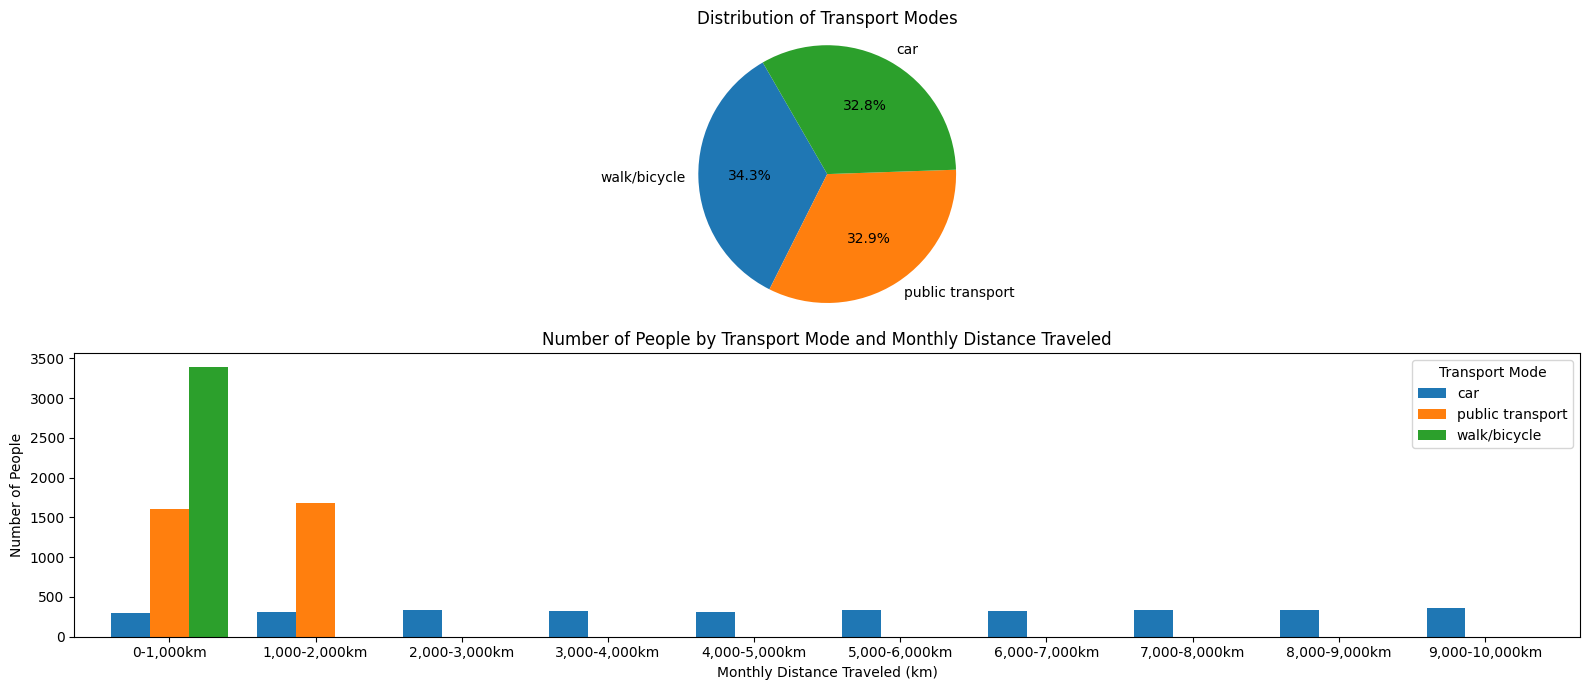

In [8]:
# Distribution of transport modes
transport_counts = df_corr['Transport'].value_counts()
labels = [label for label in transport_counts.index]
sizes = transport_counts.values

# Create categories for Vehicle_Monthly_Distance_Km with 10 bins
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
distance_labels = ["0-1,000km", "1,000-2,000km", "2,000-3,000km", "3,000-4,000km", "4,000-5,000km", 
                   "5,000-6,000km", "6,000-7,000km", "7,000-8,000km", "8,000-9,000km", "9,000-10,000km"]
df_corr['Distance_Category'] = pd.cut(df_corr['Vehicle_Monthly_Distance_Km'], bins=bins, labels=distance_labels)

# Calculate the distribution of transport modes within each Distance_Category
counts = df_corr.groupby(['Distance_Category', 'Transport'], observed=True).size().unstack(fill_value=0)

# Create the combined plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 7))


# Pie chart
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=120)
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0].set_title("Distribution of Transport Modes")

# Bar plot
counts.plot(kind='bar', ax=axes[1], width=0.8)
axes[1].set_title('Number of People by Transport Mode and Monthly Distance Traveled')
axes[1].set_xlabel('Monthly Distance Traveled (km)')
axes[1].set_ylabel('Number of People')
axes[1].legend(title='Transport Mode')
plt.xticks(rotation=0)


# Show the combined plot
plt.tight_layout()
plt.show()


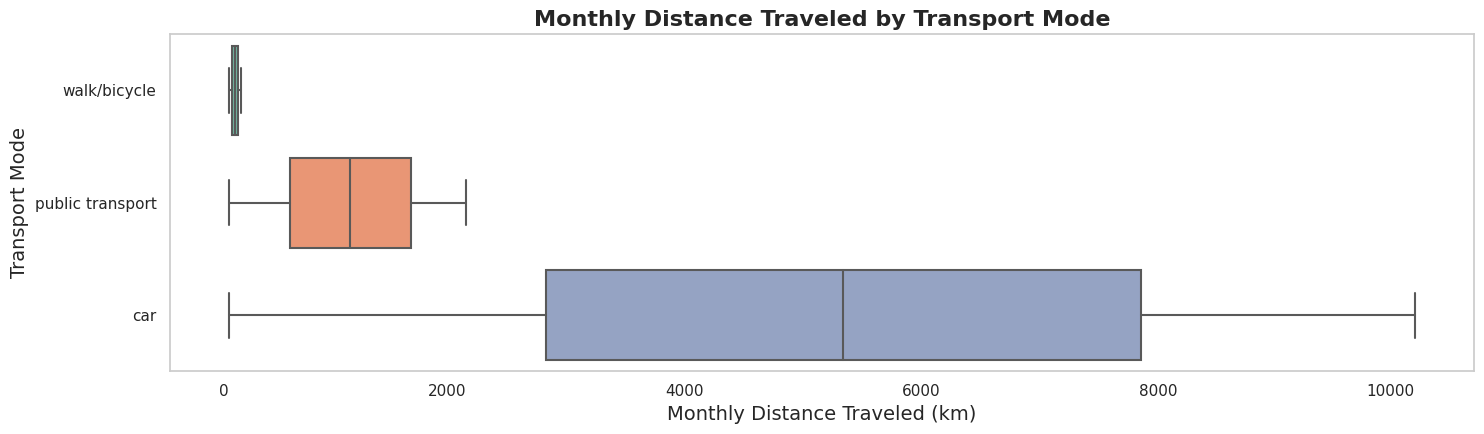

In [9]:
plt.figure(figsize=(15, 4.5))  
sns.set(style="whitegrid")  # Set background style to "whitegrid"

ax = sns.boxplot(y='Transport', x='Vehicle_Monthly_Distance_Km', data=df_corr, palette="Set2", order=['walk/bicycle','public transport','car'])

# title and axis labels
plt.title('Monthly Distance Traveled by Transport Mode', fontsize=16, weight='bold')
plt.xlabel('Monthly Distance Traveled (km)', fontsize=14)
plt.ylabel('Transport Mode', fontsize=14)


# Remove grid lines
ax.grid(False)

# Rotate X-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# save the figure in png-format
#plt.savefig('boxplot_transport.png')

plt.show()

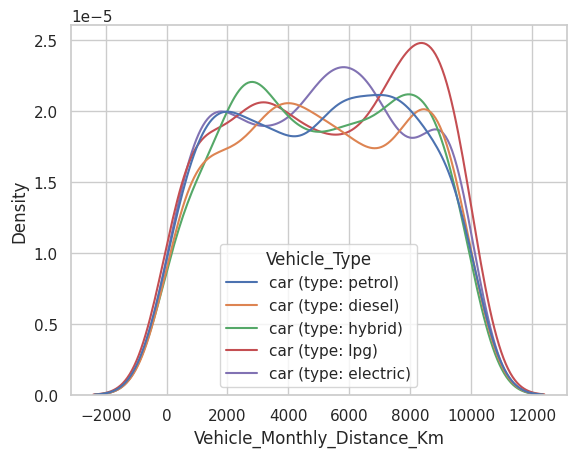

In [10]:
#df_corr['Transport_Vehicle_Type'] = df_corr['Vehicle_Type'].fillna(df_corr['Transport']) 

sns.kdeplot(data=df_corr, x="Vehicle_Monthly_Distance_Km", hue="Vehicle_Type")#,common_norm=False) 
plt.show()

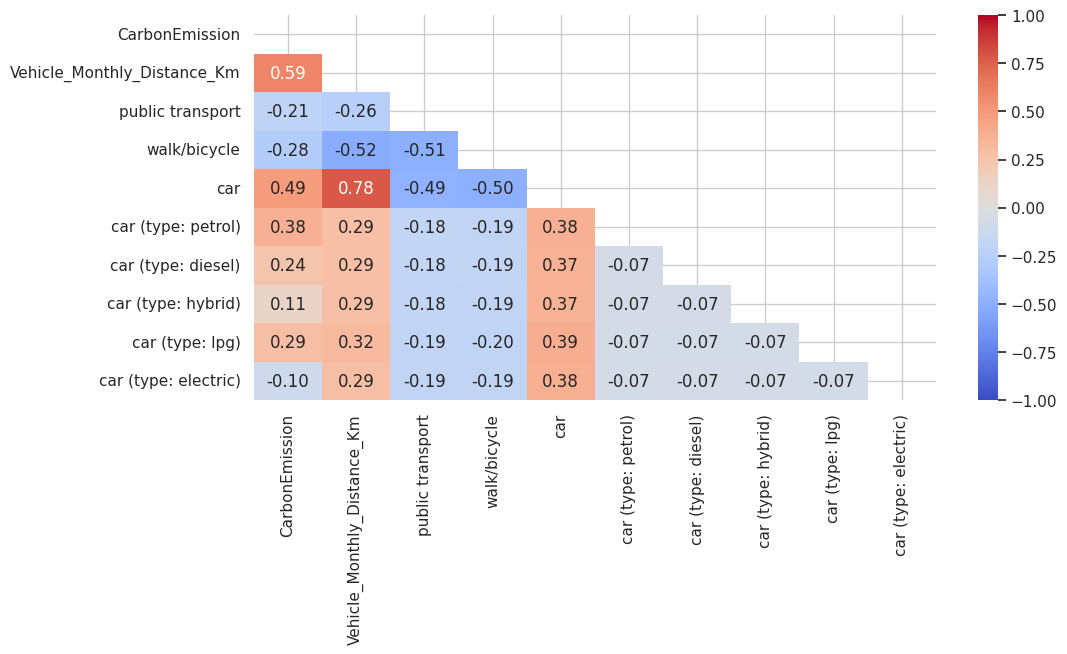

In [11]:
correlations = df_corr[['CarbonEmission', 'Vehicle_Monthly_Distance_Km', 'public transport', 'walk/bicycle', 'car','car (type: petrol)', 'car (type: diesel)', 'car (type: hybrid)','car (type: lpg)', 'car (type: electric)']].corr()

# delete upper diagonal matrix
mask = np.triu(np.ones_like(correlations, dtype=bool))

plt.figure(figsize=(11, 5))  #size of figure
sns.heatmap(correlations,fmt = '.2f', cmap="coolwarm", annot=True, mask=mask,vmax=1,vmin=-1)
plt.show()

there is a high correlation of:
* -0.52 between 'Vehicle_Monthly_Distance_Km' and 'Transport: walk/bicycle'. It makes sense that walking persons don't travel many km each month and that a person who has only a short distance to travel might walk
* 0.78 between 'Vehicle_Monthly_Distance_Km' and 'Transport: car'.

Due to the correlation between the variables 'Vehicle_Monthly_Distance_Km' and 'Transport' a linear Regression (where we want to use both variables) might not be best model  - but we will do it anyway

<a id="correlation-analysis"></a>
## 2.3. Correlation Analysis of CarbonEmission 🔗

Correlation of quantitative variables + Boolean Gender + ordinal variables 

not included are the 5 nominal variables: Transport, Vehicle_Type, Heating_Energy_Source, Recycling, Cooking


#### ordering values of ordinal variables 🗂️

In [12]:
ordinal_variable_order = {
    'Body_Type': ['underweight', 'normal', 'overweight', 'obese'],
    'Diet': ['vegan','vegetarian','pescatarian','omnivore'],
    'How_Often_Shower': ['less frequently','daily', 'twice a day','more frequently'],
    'Social_Activity': ['never', 'sometimes','often'],
    'Frequency_of_Traveling_by_Air': ['never', 'rarely', 'frequently', 'very frequently'],
    'Waste_Bag_Size': ['small','medium', 'large', 'extra large'],
    'Energy_efficiency': ['Yes', 'Sometimes', 'No']
}

# set the ordering
for column, value_ordering in ordinal_variable_order.items():
    df[column] = pd.Categorical(df[column], categories=value_ordering, ordered=True) 

#example
df['Waste_Bag_Size'].unique()

['large', 'extra large', 'small', 'medium']
Categories (4, object): ['small' < 'medium' < 'large' < 'extra large']

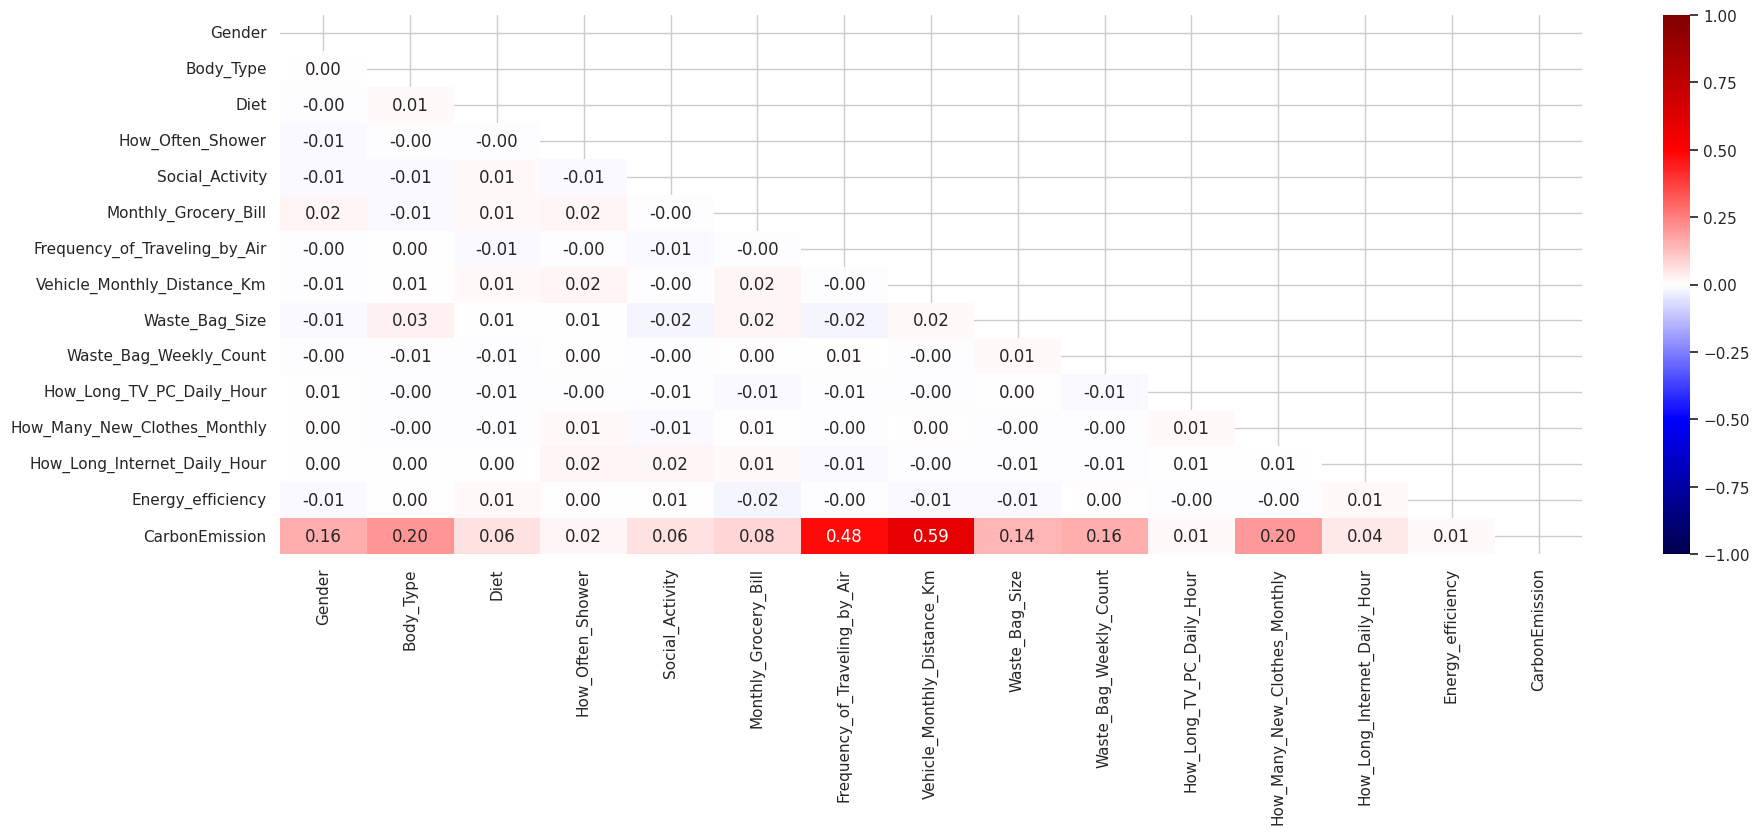

In [13]:
# Correlation of quantitative variables + Boolean-nominal-variable Gender + ordinal variables 
# not included are the 5 nominal variables: Transport, Vehicle_Type, Heating_Energy_Source, Recycling, Cooking

corr_columns =  ['Gender'] + df.select_dtypes(include=[np.number, 'category']).columns.tolist()  
df_corr_ordinal = df[corr_columns].copy()

# convert Gender to Boolean-datatyp
df_corr_ordinal['Gender'] = df['Gender'].map({'male': True, 'female': False})


# encoding for ordinal variables based on defined order
for column, column_ordering in ordinal_variable_order.items():
   mapping = {category: idx for idx, category in enumerate(column_ordering)}
   df_corr_ordinal[column] = df[column].map(mapping)

# delete upper diagonal matrix
mask = np.triu(np.ones_like(df_corr_ordinal.corr(), dtype=bool))

plt.figure(figsize=(21, 7))  #size of figure
sns.heatmap(df_corr_ordinal.corr(),fmt = '.2f', cmap="seismic", annot=True, mask=mask,vmax=1,vmin=-1) # cmap="coolwarm"  cmap="seismic"
plt.show()

In [14]:
#welche Spalten korrelieren mit der Target-Variables
pd.DataFrame(df_corr_ordinal.corr()["CarbonEmission"].round(3).abs().sort_values(ascending=False)[1:])

,CarbonEmission
Vehicle_Monthly_Distance_Km,0.594
Frequency_of_Traveling_by_Air,0.478
Body_Type,0.203
How_Many_New_Clothes_Monthly,0.199
Gender,0.164
Waste_Bag_Weekly_Count,0.159
Waste_Bag_Size,0.142
Monthly_Grocery_Bill,0.082
Diet,0.062
Social_Activity,0.055


<a id="data-preprocessing"></a>
# 3️⃣ Data Preprocessing 🛠️

<a id="duplicates"></a>
## 3.1 Checking for Duplicates 👀 🔄

In [15]:
print("Number of Duplicates:", df.duplicated().sum())

Number of Duplicates: 0


<a id="data-validation"></a>
## 3.2 Data Validation 🚫

During analysis, I noticed that the use of a grill and an airfryer are perfectly correlated (r=1), [likely due to how the data was simulated](https://www.kaggle.com/datasets/dumanmesut/individual-carbon-footprint-calculation/discussion/520906). Since the airfryer adds no new information, I've excluded it to reduce redundancy.

In [16]:
#create dummy-variables for "Cooking With":
df2 = df[['Cooking_With']].copy()
df2['Cooking_With_Grill'] = df2['Cooking_With'].apply(lambda x: 1 if "Grill" in x else 0)
df2['Cooking_With_Airfryer'] = df2['Cooking_With'].apply(lambda x: 1 if "Airfryer" in x else 0)

print("4992 people have both an air fryer and a grill, 5008 people have neither. No one has only one of the two devices.")
pd.DataFrame(df2.groupby(["Cooking_With_Airfryer","Cooking_With_Grill"]).size())

4992 people have both an air fryer and a grill, 5008 people have neither. No one has only one of the two devices.


,,0
Cooking_With_Airfryer,Cooking_With_Grill,
0,0,5008
1,1,4992


In [17]:
# see the unique values before the removal
print("unique values:", set([item for sublist in df['Cooking_With'].unique() for item in eval(sublist)]))

# Remove "Airfryer" from the 'Cooking_With'-variable
df['Cooking_With'] = df['Cooking_With'].str.replace(", 'Airfryer'", "") 

# Check if the removal was successful
print("unique values:", set([item for sublist in df['Cooking_With'].unique() for item in eval(sublist)]))

unique values: {'Stove', 'Airfryer', 'Oven', 'Microwave', 'Grill'}
unique values: {'Stove', 'Microwave', 'Oven', 'Grill'}


<a id="missingdata"></a>
## 3.3 Visualizing Missing Data 🗑️

In [18]:
#there are NaN-entries in "Vehicle Type"
df.isna().sum()

Body_Type                           0
Gender                              0
Diet                                0
How_Often_Shower                    0
Heating_Energy_Source               0
Transport                           0
Vehicle_Type                     6721
Social_Activity                     0
Monthly_Grocery_Bill                0
Frequency_of_Traveling_by_Air       0
Vehicle_Monthly_Distance_Km         0
Waste_Bag_Size                      0
Waste_Bag_Weekly_Count              0
How_Long_TV_PC_Daily_Hour           0
How_Many_New_Clothes_Monthly        0
How_Long_Internet_Daily_Hour        0
Energy_efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64

### 'Vehicle_Type' has NaN-value if and only if 'Transport' has the value 'public transport' or 'walk/bicycle'.

In [19]:
# visualize the missing values
df_nan = df[["Transport","Vehicle_Type"]].copy()

df_nan['Vehicle_Type'] = df_nan['Vehicle_Type'].fillna('NaN') # to see the NaN in the code below

pd.DataFrame(df_nan.groupby(["Transport","Vehicle_Type"]).size())

0
Transport    Vehicle_Type      
private      diesel         622
             electric       671
             hybrid         642
             lpg            697
             petrol         647
public       NaN           3294
walk/bicycle NaN           3427

#### **Observations**:

> The dataset contains 10,000 individuals with transportation preferences. A key insight is that:
>
> * 3,294 people use public transport, and 3,427 people either walk or use bicycles. For these groups, the "Vehicle_Type" field is missing, as they do not use a car.
> * The remaining individuals (4,279) use cars and have specific vehicle types filled in, such as diesel, electric, hybrid, LPG, or petrol.
>
> This missing data in the "Vehicle_Type" field aligns with the fact that public transport/walk/bicycles-groups don't own or use cars.

In [20]:
# check that: 'Vehicle_Type' has NaN-value if and only if 'Transport' has the values 'public transport' or 'walk/bicycle'.

#test: if "Transport"=="public transport" then "Vehicle Type"==NaN
assert df[df["Transport"]=="public"]["Vehicle_Type"].isna().all()  #wenn in der Liste alle True sind, kommt ein True raus dh stellt sicher das alle true sind #assert tut gar nichts bei True aber bei False macht Fehlermeldung und hört auf

#test: if "walk/bicycle" then "Vehicle Type"==NaN
assert df[df["Transport"]=="walk/bicycle"]["Vehicle_Type"].isna().all()  #wenn in der Liste alle True sind, kommt ein True raus dh stellt sicher das alle true sind #assert tut gar nichts bei True aber bei False macht Fehlermeldung und hört auf

#test: if "Transport"=="private" then "Vehicle Type"!=NaN
assert not ((df["Transport"]=="private") & (df["Vehicle_Type"].isna())).any() #any weil gibt es irgendein True? False heißt es gibt kein einziges True

### encoding-plan for missing-values

In [21]:
#df3 = df[['Transport','Vehicle_Type']].head(7).copy()
df3 = df[['Transport','Vehicle_Type']].copy()

df3['Transport_Vehicle_Type'] = df3['Vehicle_Type'].fillna(df3['Transport'])
df3['car_owner'] = (df3['Transport'] == 'private')  # aufpassen ob 'car' oder 'private' heißt

df3['Vehicle_Type'] = df3['Vehicle_Type'].fillna('NaN') # to see the NaN in the code below

# to see that: 'Transport_Vehicle_Type' & 'car_owner' hold the same information as 'Transport' & 'Vehicle_Type'. 
pd.DataFrame(df3.groupby(['car_owner',"Transport","Vehicle_Type",'Transport_Vehicle_Type']).size())

0
car_owner Transport    Vehicle_Type Transport_Vehicle_Type      
False     public       NaN          public                  3294
          walk/bicycle NaN          walk/bicycle            3427
True      private      diesel       diesel                   622
                       electric     electric                 671
                       hybrid       hybrid                   642
                       lpg          lpg                      697
                       petrol       petrol                   647

#### **Observation**:
> The two columns 'Transport_Vehicle_Type' and 'car_owner' contain the same information as the columns 'Transport' and 'Vehicle_Type'.

#### **Encoding-Plan**:
> Due to the NaN values in 'Vehicle_Type', we cannot use this variable directly. Therefore, we considered using 'Transport_Vehicle_Type' and 'car_owner' instead of 'Transport' and 'Vehicle_Type'. However, since the information from 'car_owner' is already captured in 'Transport_Vehicle_Type' and linear regression is sensitive to multicollinearity, we will **only use 'Transport_Vehicle_Type' in the regression**.

<a id="onehotencoding-multi"></a>
## 3.4 Encoding Multi-Select Features using MultiLabelBinarizer 🏷️

In [22]:
print("The entries in Recycling are of type:", type(df['Recycling'][3]), "However for encoding we need to change the datatype to list.\nHere you see an example of an entry that clearly is of type string")
df['Recycling'][3]

The entries in Recycling are of type: <class 'str'> However for encoding we need to change the datatype to list.
Here you see an example of an entry that clearly is of type string


"['Paper', 'Plastic', 'Glass', 'Metal']"

In [23]:
# Function to create dummy variables with MultiLabelBinarizer for a given column that has multi-select features
def create_dummy_variables_with_mlb(df, column_name):

    # because the data is stored as a string instead of a list
    df[column_name] = df[column_name].apply(eval)

    mlb = MultiLabelBinarizer() 
    binarized_data = mlb.fit_transform(df[column_name])
    binarized_df = pd.DataFrame(binarized_data, columns=mlb.classes_)

    df = pd.concat([df, binarized_df], axis=1)
    df = df.drop(columns=column_name)

    return df

df = create_dummy_variables_with_mlb(df, 'Recycling')
df = create_dummy_variables_with_mlb(df, 'Cooking_With')

df.head()

,Body_Type,Gender,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,CarbonEmission,Glass,Metal,Paper,Plastic,Grill,Microwave,Oven,Stove
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,2238,0,1,0,0,0,0,1,1
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,1892,0,1,0,0,0,1,0,1
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,2595,0,1,0,0,0,1,1,0
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,1074,1,1,1,1,1,1,0,0
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,4743,0,0,1,0,0,0,1,0


In [24]:
# Nachteile: man kriegt nicht Spaltennamen raus. 
#cf = ColumnTransformer(transformers=[
#    ('recycling', FunctionTransformer(lambda x: MultiLabelBinarizer().fit_transform(x.apply(eval)), validate=False), 'Recycling'),
#    ('cooking_with', FunctionTransformer(lambda x: MultiLabelBinarizer().fit_transform(x.apply(eval)), validate=False), 'Cooking_With')
#], remainder="passthrough")

## Encoding-Plan 🏷️
| Variable Type | Data Type | Variable Name | scaling & encoding |drop the first column in Encoding | 
| -----------  | :-----------:  | -----------  | :-----------: | :-----------: |
| discrete | int64 | Monthly Grocery Bill, Vehicle Monthly Distance Km, Waste Bag Weekly Count, How Long TV, PC Daily, Hour How Many New Clothes Monthly, How Long Internet Daily Hour | MinMaxScaler | / |
| ordinal | object | Body_Type, Diet, How_Often_Shower, Social_Activity, Frequency_of_Traveling_by_Air, Waste_Bag_Size, Energy_efficiency | OneHotEncoder | Yes |
| nominal, with one answer | object | Gender, Heating_Energy_Source | OneHotEncoder | Yes |
| nominal, with one answer | object | 'Vehicle_Type', 'Transport' | combine columns then OneHotEncoder | Yes |
| nominal, with multiple (or zero) answers | int64 | Recycling (Glass, Metal, Paper, Plastic), Cooking_With (Grill, Microwave, Oven, Stove) | MultiLabelBinarizer | No |
| target variable, discrete  | int64 | CarbonEmission |  / | / |

In [25]:
numeric_features = ['Monthly_Grocery_Bill', 'Vehicle_Monthly_Distance_Km', 'Waste_Bag_Weekly_Count', 'How_Long_TV_PC_Daily_Hour', 'How_Many_New_Clothes_Monthly', 'How_Long_Internet_Daily_Hour']

nominal_multi_answer_features=['Glass','Metal','Paper','Plastic','Grill','Microwave','Oven','Stove']

# Ordinal Variables & Single-Select Nominal Features
categorical_features = ['Body_Type','Diet','How_Often_Shower','Social_Activity','Frequency_of_Traveling_by_Air','Waste_Bag_Size','Energy_efficiency'] + ['Gender','Heating_Energy_Source'] #,'Transport_Vehicle_Type']

In [26]:
#check if the lists above contain all columns or if I forgot some
all_columns=set(["CarbonEmission",'Vehicle_Type', 'Transport']).union(
    numeric_features,
    categorical_features,
    nominal_multi_answer_features)

assert all_columns  == set(df.columns.tolist())

<a id="columntransformer"></a>
## 3.5 ColumnTransformer 🧩

In [27]:
# for 'Vehicle_Type' and 'Transport':
def transport_custom_impute(X):
    # Ersetze NaN in Vehicle_type mit den Werten aus Transport
    X['Transport_Vehicle_Type'] = X['Vehicle_Type'].fillna(X['Transport'])
    return X[['Transport_Vehicle_Type']]

transport_pipeline = Pipeline(steps=[
    ('transport_imputer', FunctionTransformer(transport_custom_impute, validate=False)),
    ('onehot', OneHotEncoder(drop="first"))  
])

preprocessor = ColumnTransformer(transformers=[
        ("numerical", MinMaxScaler(), numeric_features),
        ("transport_vehicletype", transport_pipeline, ['Vehicle_Type', 'Transport']),
        ("categorical", OneHotEncoder(drop="first"), categorical_features)
    ],remainder="passthrough")

X = df.drop(["CarbonEmission"], axis=1)
X_transformed = preprocessor.fit_transform(X)

# To see the ColumnTransformer
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', MinMaxScaler(),
                                 ['Monthly_Grocery_Bill',
                                  'Vehicle_Monthly_Distance_Km',
                                  'Waste_Bag_Weekly_Count',
                                  'How_Long_TV_PC_Daily_Hour',
                                  'How_Many_New_Clothes_Monthly',
                                  'How_Long_Internet_Daily_Hour']),
                                ('transport_vehicletype',
                                 Pipeline(steps=[('transport_imputer',
                                                  FunctionTransformer(func=<function transport_custom_impute at 0x7888fd9db490>)),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Vehicle_Type', 'Transport']),
                                ('categorical', OneHotEncoder(drop='first'),
                                 ['Body_Type', 'Diet', 'How_Often_Shower',
                                  'Social_Activity',
                                  'Frequency_of_Traveling_by_Air',
                                  'Waste_Bag_Size', 'Energy_efficiency',
                                  'Gender', 'Heating_Energy_Source'])])

## get column names after ColumnTransformer ✍️ 
because ColumnTransformer removed column names

In [28]:
def get_passthrough_columns(column_transformer, X):
    """
    Extracts the columns that are passed through without transformation in the ColumnTransformer.

    Args:
        column_transformer (ColumnTransformer): Fitted ColumnTransformer object.
        X (pd.DataFrame): Original DataFrame before transformation.

    Returns:
        List[str]: List of column names that are passed through.
    """
    passthrough_indices = column_transformer.transformers_[-1][-1]
    return X.columns[passthrough_indices].tolist() 


def get_identity_columns(column_transformer, begin_index, end_index):
    """
    Extracts the columns from the ColumnTransformer that remain unchanged in terms of their structure,
    meaning they undergo transformations but  the column number remains the same.

    Args:
        column_transformer (ColumnTransformer): Fitted ColumnTransformer object.
        begin_index (int): Starting index of the identity transformers.
        end_index (int): Ending index (exclusive) of the identity transformers.

    Returns:
        List[str]: List of column names that remain unchanged in number.
    """
    col_names = []
    for _, _, col in column_transformer.transformers_[begin_index:end_index]:
        col_names.extend(col)  # Collect all untransformed column names
    return col_names


def get_onehot_encoded_columns(column_transformer, begin_index, end_index):
    """
    Extracts the OneHotEncoded feature names for the specified transformers in the ColumnTransformer.

    Args:
        column_transformer (ColumnTransformer): Fitted ColumnTransformer object.
        begin_index (int): Starting index of the ordinal encoders.
        end_index (int): Ending index (exclusive) of the ordinal encoders.

    Returns:
        List[str]: List of one-hot encoded feature names.
    """
    ohe_feature_names = []
    for col_name, _, col_list in column_transformer.transformers_[begin_index:end_index]:
        ohe_features = column_transformer.named_transformers_[col_name].get_feature_names_out(col_list).tolist()
        ohe_feature_names.extend(ohe_features)
    return ohe_feature_names

In [29]:
# Spaltenanzahl bleibt gleich
# name of the first transformers (transformers index 0 till excluding index 1)
numeric_features = get_identity_columns(preprocessor, 0, 1)

# ❌ hier fehlt noch Spaltennnamen für OneHot-Encoding für Transport_Vehicle_Type❌
# Transport-Pipeline Features
transport_encoder = preprocessor.named_transformers_['transport_vehicletype'].named_steps['onehot']
transport_feature_names = transport_encoder.get_feature_names_out(['Transport_Vehicle_Type']).tolist()

# Spaltenanzahl erhöht
# name of the transformers index 1 till excluding index -1 (excluding passthrough) ❌habe von 1 auf 2 geändert wegen Transport_Vehicletyp. stimmt das? ❌
dummy_categorical_features = get_onehot_encoded_columns(preprocessor, 2, -1)  

# name of the first three transformers index -1
passthrough_columns = get_passthrough_columns(preprocessor, X)

transformed_feature_names = numeric_features + transport_feature_names + dummy_categorical_features + passthrough_columns

X_transformed = pd.DataFrame(X_transformed, columns=transformed_feature_names)

In [30]:
#to see the Encoding
X_transformed.head()

,Monthly_Grocery_Bill,Vehicle_Monthly_Distance_Km,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Transport_Vehicle_Type_electric,Transport_Vehicle_Type_hybrid,Transport_Vehicle_Type_lpg,Transport_Vehicle_Type_petrol,Transport_Vehicle_Type_public,Transport_Vehicle_Type_walk/bicycle,Body_Type_obese,Body_Type_overweight,Body_Type_underweight,Diet_pescatarian,Diet_vegan,Diet_vegetarian,How_Often_Shower_less frequently,How_Often_Shower_more frequently,How_Often_Shower_twice a day,Social_Activity_often,Social_Activity_sometimes,Frequency_of_Traveling_by_Air_never,Frequency_of_Traveling_by_Air_rarely,Frequency_of_Traveling_by_Air_very frequently,Waste_Bag_Size_large,Waste_Bag_Size_medium,Waste_Bag_Size_small,Energy_efficiency_Sometimes,Energy_efficiency_Yes,Gender_male,Heating_Energy_Source_electricity,Heating_Energy_Source_natural gas,Heating_Energy_Source_wood,Glass,Metal,Paper,Plastic,Grill,Microwave,Oven,Stove
0,0.722892,0.021002,0.500000,0.291667,0.52,0.041667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.257028,0.000900,0.333333,0.375000,0.76,0.208333,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.353414,0.247225,0.000000,0.583333,0.94,0.250000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.429719,0.007401,0.333333,0.833333,0.10,0.291667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
4,0.867470,0.845785,0.000000,0.125000,0.10,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [31]:
#to see the Encoding
df.head()

,Body_Type,Gender,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,CarbonEmission,Glass,Metal,Paper,Plastic,Grill,Microwave,Oven,Stove
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,2238,0,1,0,0,0,0,1,1
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,1892,0,1,0,0,0,1,0,1
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,2595,0,1,0,0,0,1,1,0
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,1074,1,1,1,1,1,1,0,0
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,4743,0,0,1,0,0,0,1,0


<a id="linear-regression"></a>
# 4️⃣ Model: Linear Regression 📈

<a id="model-training"></a>
## 4.1. Model Training 🏋️‍

In [32]:
#model = Pipeline(steps=[("preprocessor", preprocessor), ("model", LinearRegression())])
model = LinearRegression()

X = df.drop(["CarbonEmission"], axis=1)
y = df["CarbonEmission"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, train_size = 0.9)

model.fit(X_train, y_train)

LinearRegression()

## Regression Evaluation Metrics ⚖️

In [33]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

pd.DataFrame({
    'R-squared': [
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)
    ],
    'Mean Absolute Error (MAE)': [
        mean_absolute_error(y_train, y_train_pred).round(2),
        mean_absolute_error(y_test, y_test_pred).round(2)
    ],
    'Mean Squared Error (MSE)': [
        mean_squared_error(y_train, y_train_pred).round(2),
        mean_squared_error(y_test, y_test_pred).round(2)
    ],
    'Root Mean Square Error (RMSE)': [
        np.sqrt(mean_squared_error(y_train, y_train_pred)).round(2),
        np.sqrt(mean_squared_error(y_test, y_test_pred)).round(2)
    ]
}, index=['Training Set Evaluation', 'Test Set Evaluation'])

,R-squared,Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Square Error (RMSE)
Training Set Evaluation,0.933061,175.32,68769.32,262.24
Test Set Evaluation,0.939715,174.85,66771.77,258.40


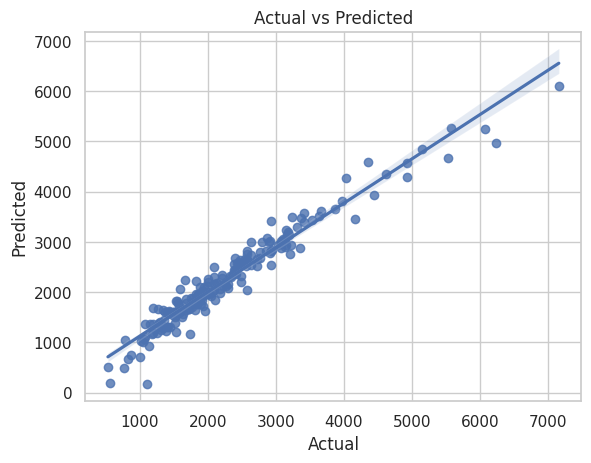

In [34]:
y_pred = model.predict(X_test)
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).sample(200)

# Plotting the results
sns.regplot(x='Actual', y='Predicted', data=df_results)
plt.title('Actual vs Predicted')
plt.show()

<a id="model-saving"></a>
## 4.2. Model Saving in pkl-format  💾 

In [35]:
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

## get column names after ColumnTransformer ✍️ 
because ColumnTransformer removed column names

In [36]:
#onehot_columns = model.named_steps['preprocessor'].named_transformers_["onehot"].get_feature_names_out(categorical_features)
#passthrough_indices = model.named_steps['preprocessor'].transformers_[-1][-1]
#passthrough_columns = X_train.columns[passthrough_indices].tolist()

#transformed_feature_names = numeric_features + list(onehot_columns) + passthrough_columns

<a id="regression-equation"></a>
## 4.3. Regression Equation

In [37]:
#regression_equation ="Regression Equation: CarbonEmission = "
#for variable, slope in list(zip(transformed_feature_names, model.named_steps['model'].coef_)):
#   regression_equation += "(" + str(round(slope,1)) + "*" + variable + ") + "
#regression_equation += str(round(model.named_steps['model'].intercept_,1)) + " + Error"

#regression_equation

<a id="regression-coefficients"></a>
## 4.4. Regression Coefficients 📐 

In [38]:
#print("Intercept: ", model.named_steps['model'].intercept_)

#pd.DataFrame({'Feature': transformed_feature_names,'Coefficient': model.named_steps['model'].coef_.round(1)})

<a id="prediction"></a>
## 4.5. Prediction 🔮

In [39]:
#make up new persons and predict their Carbon Emission
X_pred = pd.DataFrame([
  ["overweight","female","pescatarian","daily","coal","walk/bicycle", np.nan,"often",230,"frequently",210,"large", 4,7,26,1,"No",False,1,0,0,True,0,0,1],
  ["obese","female","vegetarian","less frequently","natural gas","walk/bicycle", np.nan,"often",114,"rarely",9,"extra large",3,9,38,5,"No",False,1,0,0,False,1,0,1]  
], columns=[ 'Body_Type', 'Gender', 'Diet', 'How_Often_Shower', 'Heating_Energy_Source',  'Transport', 'Vehicle_Type','Social_Activity','Monthly_Grocery_Bill',  'Frequency_of_Traveling_by_Air', 'Vehicle_Monthly_Distance_Km','Waste_Bag_Size','Waste_Bag_Weekly_Count', 'How_Long_TV_PC_Daily_Hour', 'How_Many_New_Clothes_Monthly', 'How_Long_Internet_Daily_Hour', 'Energy_efficiency','Glass', 'Metal', 'Plastic', 'Paper', 'Oven', 'Microwave', 'Grill', 'Stove'])

y_pred = model.predict(preprocessor.transform(X_pred)).round(0)
print("predicted CarbonEmission: ", y_pred)

X_pred

predicted CarbonEmission:  [2392. 1965.]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Body_Type,Gender,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Glass,Metal,Plastic,Paper,Oven,Microwave,Grill,Stove
0,overweight,female,pescatarian,daily,coal,walk/bicycle,NaN,often,230,frequently,210,large,4,7,26,1,No,False,1,0,0,True,0,0,1
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,False,1,0,0,False,1,0,1


In [40]:
#first 2 persons in df

X_pred= df.loc[0:1, X.columns] 
y_pred = model.predict(preprocessor.transform(X_pred)).round(0)
print("predicted CarbonEmission of first 2 persons: ", y_pred)

y_true = list(df.loc[0:1, 'CarbonEmission'])
print("actual CarbonEmission of first 2 persons: ", y_true)

X_pred

predicted CarbonEmission of first 2 persons:  [2263. 1965.]
actual CarbonEmission of first 2 persons:  [2238, 1892]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Body_Type,Gender,Diet,How_Often_Shower,Heating_Energy_Source,Transport,Vehicle_Type,Social_Activity,Monthly_Grocery_Bill,Frequency_of_Traveling_by_Air,Vehicle_Monthly_Distance_Km,Waste_Bag_Size,Waste_Bag_Weekly_Count,How_Long_TV_PC_Daily_Hour,How_Many_New_Clothes_Monthly,How_Long_Internet_Daily_Hour,Energy_efficiency,Glass,Metal,Paper,Plastic,Grill,Microwave,Oven,Stove
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,0,1,0,0,0,0,1,1
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,0,1,0,0,0,1,0,1


In [41]:
#Predictions based on test data X_test
y_pred = model.predict(X_test)

results_df = pd.DataFrame(data = {
    'Ground Truth': y_test, 
    'Predicted': y_pred.round(0), 
    'Residuals': np.abs(y_test - y_pred).round(0)
})

#Show Actual Values & Predicted Values
results_df

,Ground Truth,Predicted,Residuals
395,2106,2077.0,29.0
4630,1803,2073.0,270.0
453,1795,1694.0,101.0
4844,2134,2340.0,206.0
7197,2598,2650.0,52.0
...,...,...,...
5731,4350,4585.0,235.0
7341,2387,2320.0,67.0
4565,1935,2149.0,214.0
5894,1458,1314.0,144.0


# 5️⃣ Assumptions of Linear Regression

## 1. Linearity

Linearity (Linearität):
   $Y_i = \beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + ... + \beta_pX_{ip} + \varepsilon_i$
   
   Wobei $Y_i$ die abhängige Variable, $X_{ij}$ die unabhängigen Variablen, $\beta_j$ die Koeffizienten und $\varepsilon_i$ der Fehlerterm sind.

We can check linearity by plotting the residuals against the predicted values. If the relationship is linear, we should see a random scatter of points.

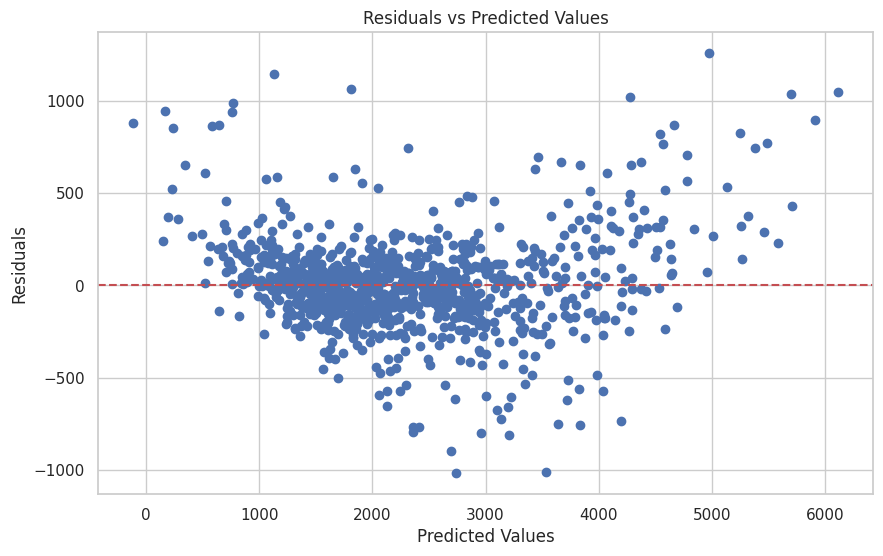

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Predict values
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

#### **Interpretation**:

> The U-shaped pattern observed in this plot suggests a nonlinear relationship between our predictors and the target variable (carbon emissions). This indicates that our linear regression model may not be capturing some important nonlinear aspects of the data. Specifically:
> 
> 1. Systematic bias: The U-shape implies that our model tends to overestimate carbon emissions for both low and high predicted values, while underestimating for middle-range predictions.
> 
> 2. Violation of linearity assumption: This pattern is a clear indication that the linearity assumption of our regression model is violated.  
> 
> 3. Model limitations: Our current linear model is not flexible enough to capture the true underlying relationship in the data. This could lead to less accurate predictions, especially at the extremes of our data range.
> 
> 4. Potential improvements: To address this, we might consider:
>      - Exploring other non-linear regression models (e.g., Random Forests, Gradient Boosting Machines).
>      - Transforming some of our variables (e.g., log transformation) to linearize the relationship.

## 2. Independence

Independence (Unabhängigkeit):
   $Cov(\varepsilon_i, \varepsilon_j) = 0$ for all $i \neq j$
   
   Die Fehlerterme $\varepsilon_i$ und $\varepsilon_j$ sind unkorreliert für alle unterschiedlichen Beobachtungen $i$ und $j$.

## 3. Homoscedasticity

Homoscedasticity (Homoskedastizität):
   $Var(\varepsilon_i) = \sigma^2$ for all $i$
   
Die Varianz der Fehlerterme $\varepsilon_i$ ist konstant für alle Beobachtungen.

## 4. Normality of Residuals

Normality (Normalität):
   $\varepsilon_i \sim N(0, \sigma^2)$
   
   Die Fehlerterme $\varepsilon_i$ sind normalverteilt mit Mittelwert 0 und konstanter Varianz $\sigma^2$.

If the residuals are normally distributed, the points in the Q-Q plot should approximately lie on a straight diagonal line.

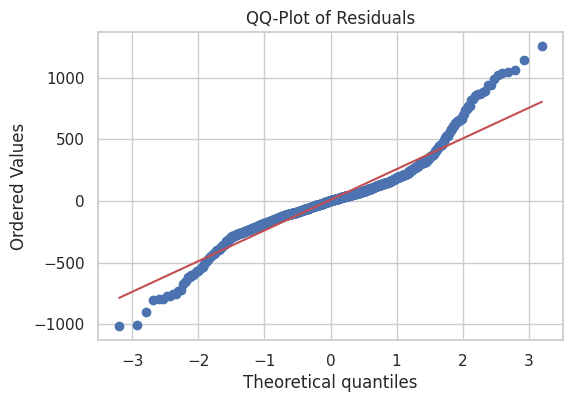

In [43]:
# QQ Plot
from scipy import stats

y_pred = model.predict(X_test)
residuals = y_test.values - y_pred

plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot of Residuals')
plt.show()

> #### Interpretation:
>  If the points closely follow the diagonal line, it suggests that the residuals are approximately normally distributed. Significant deviations from the line may indicate non-normality.
>
> 1. Central Distribution: Between the quantiles -2 and 2, our residuals closely follow the diagonal line. This suggests that for the majority of our data, the residuals are approximately normally distributed, which is a positive sign for our model.
>
> 2. Left Tail (below -2): The line falls below the diagonal, indicating that our model produces more extreme negative residuals than expected in a perfectly normal distribution. This suggests that for some lower predictions, our model is overestimating carbon emissions more than expected.
>
> 3. Right Tail (above 2): The line rises above the diagonal, showing that our model also produces more extreme positive residuals than a normal distribution would predict. This implies that for some higher predictions, our model is underestimating carbon emissions more than expected.
>

***I always appreciate Feedback because I want to improve. Feel free to add any of your thoughts below. Thank you!***

<div style="background-color: darkblue; padding: 20px; border-radius: 10px; margin: 20px auto; max-width: 800px;">
    <center>
        <div style="background-color: #ecf0f1; padding: 20px; border-radius: 10px;">
            <b style="font-size: 24px; color: darkblue;">💡🙏 &nbsp; ENJOYED THIS? GIVE IT A UPVOTE! &nbsp; 👍💙</b>
            <div style="margin-top: 20px; font-size: 18px; color: #34495e;">
                🚀✨ If you found this notebook helpful or interesting, feel free to drop an upvote! 🎯 <br> Your support keeps me motivated to create more valuable content. 💪😄
                <br><br>
                👉 <a href="https://www.kaggle.com/code/eprossinger/linear-regression-with-columntransformer" style="font-size: 18px; font-weight: bold;">Click here to see my notebook and upvote!</a> 👈
            </div>
        </div>
    </center>
</div>